In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/run-or-walk/dataset.csv


In [2]:
data=pd.read_csv("/kaggle/input/run-or-walk/dataset.csv")
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [3]:
set(data["username"])

{'viktor'}

Username column is useless.

In [4]:
del data["username"]

In [5]:
set(data["date"])

{'2017-6-30',
 '2017-7-1',
 '2017-7-10',
 '2017-7-11',
 '2017-7-15',
 '2017-7-16',
 '2017-7-17',
 '2017-7-2',
 '2017-7-4',
 '2017-7-6',
 '2017-7-7',
 '2017-7-9'}

Maybe date data is useful.

In [6]:
set(data["wrist"])

{0, 1}

In [7]:
set(data["activity"])

{0, 1}

Now we make some plots with this data.

In [8]:
import seaborn as sns

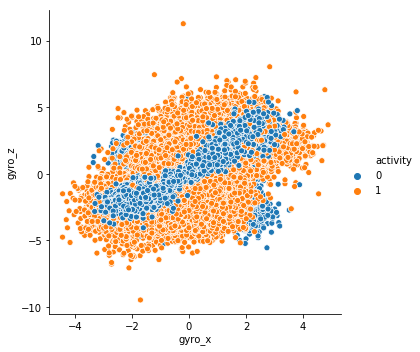

In [9]:

sns.relplot(data=data,x="gyro_x",y="gyro_z",hue="activity")

maybe abs of this values has impact of quality of this plot.

In [10]:
newframe=pd.DataFrame({
    "gyrox":data["gyro_x"].abs(),
    "gyroz":data["gyro_z"].abs(),
    "activity":data["activity"]
})


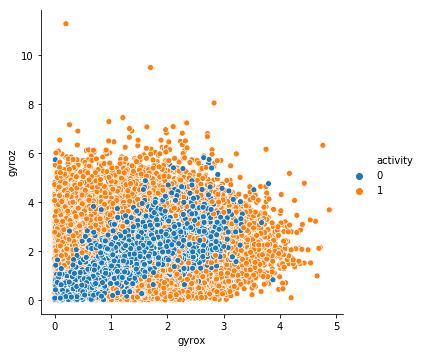

In [11]:
sns.relplot(data=newframe,x="gyrox",y="gyroz",hue="activity")

Okay not clearly separate data but have some information.

I think Random Forest is work pretty well in this dataset. 

In [12]:
x=data.iloc[:,4:]
xadd=data["wrist"]
x["wrist"]=xadd
y=data["activity"]

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
print(cross_val_score(rfc, x, y, cv=10)) 

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

[0.98724605 0.99525959 0.99650113 0.9950333  0.99683937 0.99074283
 0.96432603 0.98182434 0.98758185 0.98216302]


Random Forest work nearly perfect.

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=2000)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
ypred=rfc.predict(x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [15]:
print(confusion_matrix(y_pred=ypred,y_true=y_test))
print(accuracy_score(y_pred=ypred,y_true=y_test))
print(classification_report(y_pred=ypred,y_true=y_test))

[[13293    94]
 [  131 13059]]
0.99153403318659
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13387
           1       0.99      0.99      0.99     13190

    accuracy                           0.99     26577
   macro avg       0.99      0.99      0.99     26577
weighted avg       0.99      0.99      0.99     26577



%99 accuracy.

What about use 100 estimators instead of 10

In [16]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
ypred=rfc.predict(x_test)
print(confusion_matrix(y_pred=ypred,y_true=y_test))
print(accuracy_score(y_pred=ypred,y_true=y_test))
print(classification_report(y_pred=ypred,y_true=y_test))

[[13290    97]
 [  101 13089]]
0.9925499492041991
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13387
           1       0.99      0.99      0.99     13190

    accuracy                           0.99     26577
   macro avg       0.99      0.99      0.99     26577
weighted avg       0.99      0.99      0.99     26577



## Random Forest work very very good in this dataset!